Going to explore the new cleaned player data and hopefully run some information on more team data and aggregates of their players

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
from datetime import datetime

# Load environment variables from .env file
load_dotenv()

# Load the cleaned data
file_path = os.getenv('CLEANED_PLAYERS_DATA_PATH')
if file_path is None:
    raise ValueError("CLEANED_PLAYERS_DATA_PATH environment variable not set.")

cleaned_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
cleaned_data.head()

cleaned_data['BirthDate'] = pd.to_datetime(cleaned_data['BirthDate'], errors='coerce')
cleaned_data['Age'] = cleaned_data['BirthDate'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)


In [44]:
# Create a dictionary to store DataFrames for each team
team_dataframes = {}

# Iterate over unique teams and create a DataFrame for each team
for team in cleaned_data['Team'].unique():
    team_df = cleaned_data[cleaned_data['Team'] == team]
    team_dataframes[team] = team_df
# Function to get a DataFrame for a specific team
def get_team_dataframe(team):
    return team_dataframes.get(team.upper())
# Example: Access the DataFrame for the Detroit Tigers (DET)
det_players_df = team_dataframes.get('DET')
if det_players_df is not None:
    print(f"Detroit Tigers DataFrame:\n{det_players_df.head()}")

# Example: Access the DataFrame for the San Francisco Giants (SF)
sf_players_df = team_dataframes.get('SF')
if sf_players_df is not None:
    print(f"San Francisco Giants DataFrame:\n{sf_players_df.head()}")

Detroit Tigers DataFrame:
     PlayerID  SportsDataID              Status  TeamID Team  Jersey  \
0    10000005           NaN  Non-Roster Invitee      17  DET     NaN   
19   10000213           NaN              Active      17  DET    28.0   
37   10000378           NaN              Active      17  DET    43.0   
114  10001191           NaN              Active      17  DET    38.0   
225  10005288           NaN              Active      17  DET    18.0   

    PositionCategory Position   MLBAMID FirstName  ... Weight  BirthDate  \
0                  P       RP  605177.0    Andrew  ...  235.0 1990-06-17   
19                IF       SS  595879.0    Javier  ...  190.0 1992-12-01   
37                 P       RP  592454.0     Tommy  ...  230.0 1989-08-07   
114                P       SP  502171.0      Alex  ...  205.0 1987-10-07   
225                P       SP  628317.0     Kenta  ...  185.0 1988-04-11   

     BirthCity  BirthState  BirthCountry                  HighSchool  \
0    Ketteri

In [45]:
# Access the DataFrame for the New York Yankees (NYY)
nyy_players_df = get_team_dataframe('NYY')
if nyy_players_df is not None:
    print(f"New York Yankees DataFrame:\n{nyy_players_df.head()}")

# Access the DataFrame for the Boston Red Sox (BOS)
bos_players_df = get_team_dataframe('BOS')
if bos_players_df is not None:
    print(f"Boston Red Sox DataFrame:\n{bos_players_df.head()}")

New York Yankees DataFrame:
    PlayerID  SportsDataID              Status  TeamID Team  Jersey  \
4   10000031           NaN              Active      29  NYY    48.0   
32  10000330           NaN  Non-Roster Invitee      29  NYY    59.0   
38  10000383           NaN  Non-Roster Invitee      29  NYY    68.0   
41  10000397           NaN              Active      29  NYY    26.0   
69  10000690           NaN              Active      29  NYY    27.0   

   PositionCategory Position   MLBAMID  FirstName  ... Weight  BirthDate  \
4                IF       1B  502671.0       Paul  ...  225.0 1987-09-10   
32                P       SP  471911.0     Carlos  ...  224.0 1987-03-21   
38                P       RP  554431.0      Tyler  ...  230.0 1990-10-19   
41               IF       3B  518934.0         DJ  ...  220.0 1988-07-13   
69               DH       DH  519317.0  Giancarlo  ...  245.0 1989-11-08   

        BirthCity  BirthState  BirthCountry  \
4      Wilmington          DE           U

DET: 217 players
SF: 223 players
TEX: 218 players
CHW: 224 players
NYY: 225 players
LAD: 227 players
ARI: 213 players
TOR: 206 players
ATH: 215 players
SD: 185 players
SEA: 223 players
CIN: 209 players
MIN: 202 players
LAA: 197 players
NYM: 224 players
HOU: 229 players
ATL: 200 players
MIA: 241 players
BOS: 235 players
CLE: 221 players
STL: 201 players
PHI: 245 players
CHC: 245 players
KC: 190 players
PIT: 238 players
TB: 213 players
MIL: 252 players
BAL: 217 players
COL: 197 players
WSH: 213 players


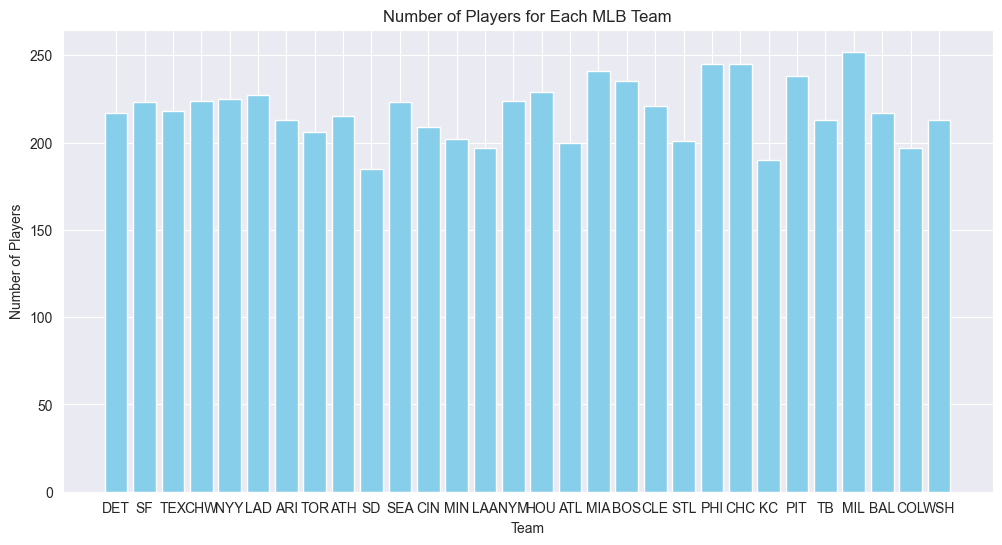

In [46]:

# Display the number of players for each team

# Create a dictionary to store the number of players for each team
team_player_counts = {}

# Iterate over the team DataFrames and count the number of players for each team

for team, team_df in team_dataframes.items():
    team_player_counts[team] = len(team_df)
    
# Display the number of players for each team

for team, player_count in team_player_counts.items():
    print(f"{team}: {player_count} players")
    
# Create a bar plot of the number of players for each team

# Set the style of the plot
sns.set_style("darkgrid")

# Create a bar plot

plt.figure(figsize=(12, 6))
plt.bar(team_player_counts.keys(), team_player_counts.values(), color='skyblue')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Number of Players for Each MLB Team')
plt.show()

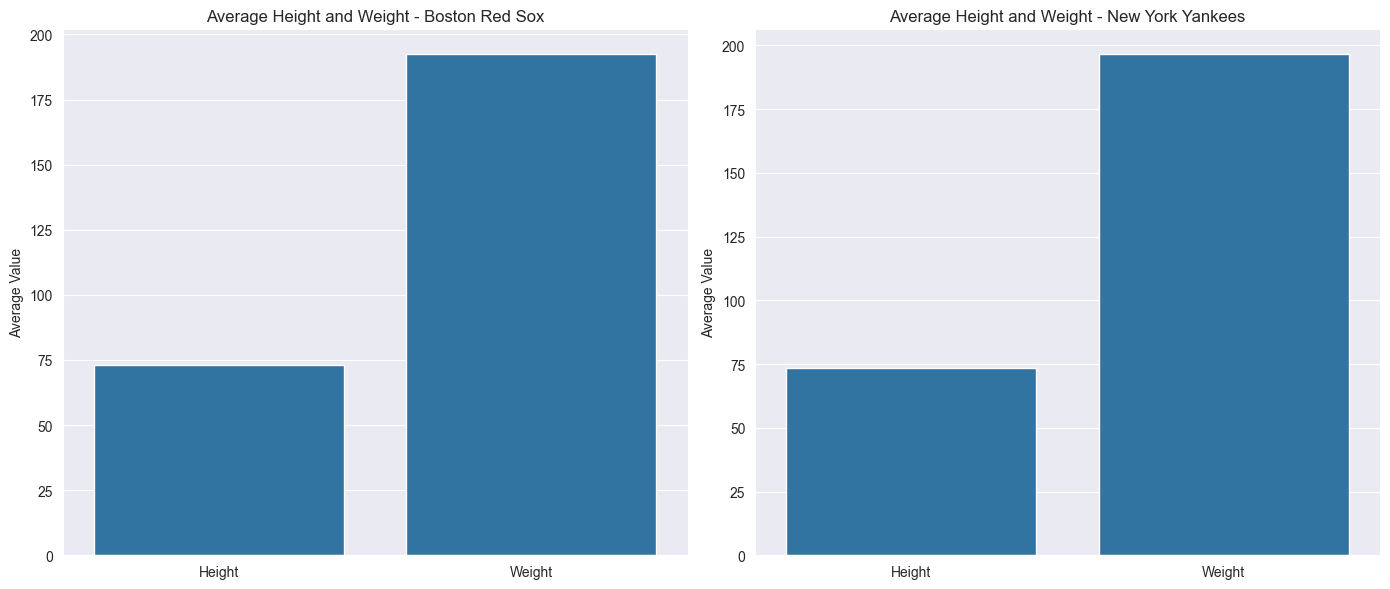

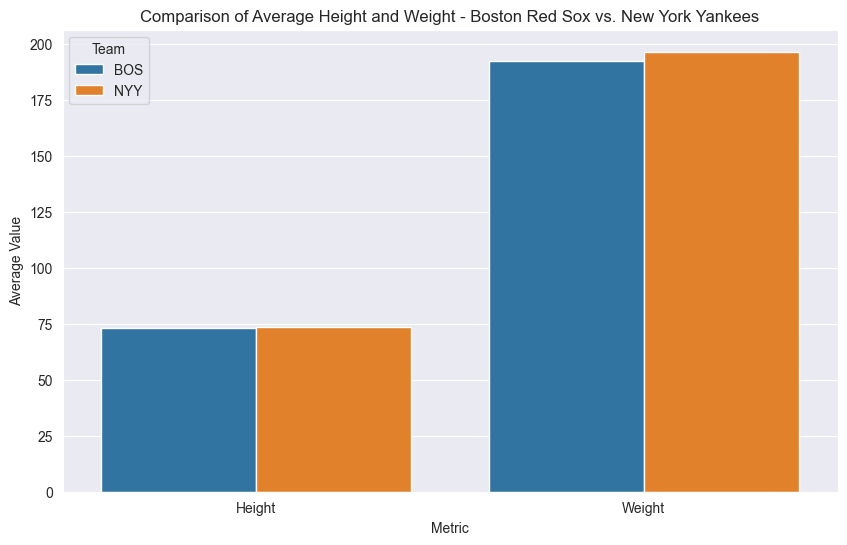

In [47]:
# Calculate average height and weight for each team
bos_avg_height = bos_players_df['Height'].mean()
bos_avg_weight = bos_players_df['Weight'].mean()
nyy_avg_height = nyy_players_df['Height'].mean()
nyy_avg_weight = nyy_players_df['Weight'].mean()

# Create individual charts for each team
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boston Red Sox chart
sns.barplot(x=['Height', 'Weight'], y=[bos_avg_height, bos_avg_weight], ax=axes[0])
axes[0].set_title('Average Height and Weight - Boston Red Sox')
axes[0].set_ylabel('Average Value')

# New York Yankees chart
sns.barplot(x=['Height', 'Weight'], y=[nyy_avg_height, nyy_avg_weight], ax=axes[1])
axes[1].set_title('Average Height and Weight - New York Yankees')
axes[1].set_ylabel('Average Value')

plt.tight_layout()
plt.show()

# Create a combined chart to compare the averages
avg_data = pd.DataFrame({
    'Team': ['BOS', 'BOS', 'NYY', 'NYY'],
    'Metric': ['Height', 'Weight', 'Height', 'Weight'],
    'Average': [bos_avg_height, bos_avg_weight, nyy_avg_height, nyy_avg_weight]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average', hue='Team', data=avg_data)
plt.title('Comparison of Average Height and Weight - Boston Red Sox vs. New York Yankees')
plt.ylabel('Average Value')
plt.show()

In [48]:
stl_players_df = get_team_dataframe('STL')
chc_players_df = get_team_dataframe('CHC')
cin_players_df = get_team_dataframe('CIN')
pit_players_df = get_team_dataframe('PIT')
mil_players_df = get_team_dataframe('MIL')
tex_players_df = get_team_dataframe('TEX')
hou_players_df = get_team_dataframe('HOU')
kc_players_df = get_team_dataframe('KC')
cle_players_df = get_team_dataframe('CLE')
min_players_df = get_team_dataframe('MIN')
det_players_df = get_team_dataframe('DET')
cws_players_df = get_team_dataframe('CWS')
sea_players_df = get_team_dataframe('SEA')
oak_players_df = get_team_dataframe('ATH')
laa_players_df = get_team_dataframe('LAA')
ari_players_df = get_team_dataframe('ARI')
sd_players_df = get_team_dataframe('SD')
col_players_df = get_team_dataframe('COL')
sf_players_df = get_team_dataframe('SF')
lad_players_df = get_team_dataframe('LAD')
nym_players_df = get_team_dataframe('NYM')
atl_players_df = get_team_dataframe('ATL')
phi_players_df = get_team_dataframe('PHI')
mia_players_df = get_team_dataframe('MIA')
tb_players_df = get_team_dataframe('TB')
tor_players_df = get_team_dataframe('TOR')
bal_players_df = get_team_dataframe('BAL')
was_players_df = get_team_dataframe('WSH')
bos_players_df = get_team_dataframe('BOS')
nyy_players_df = get_team_dataframe('NYY')


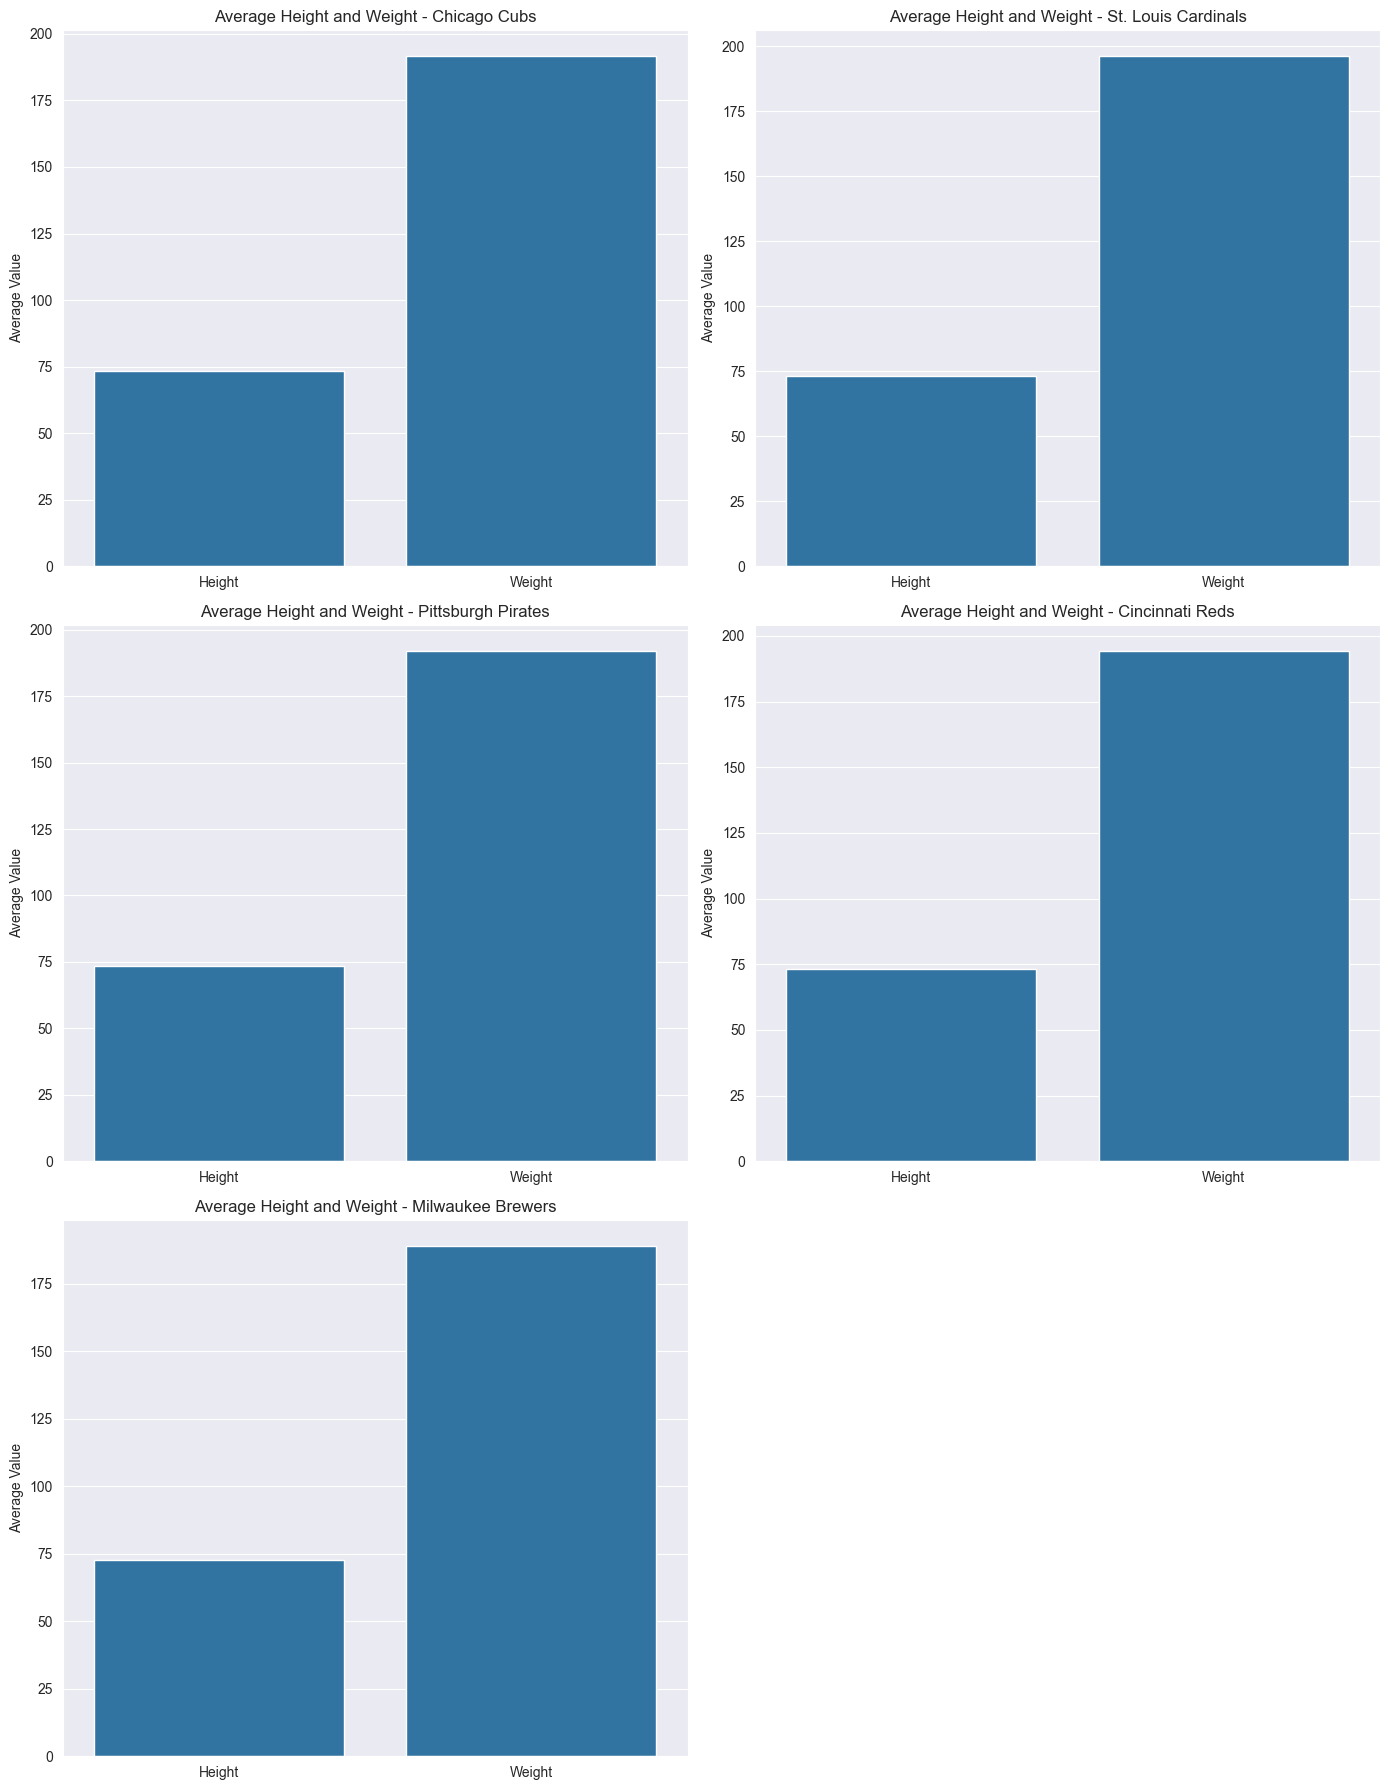

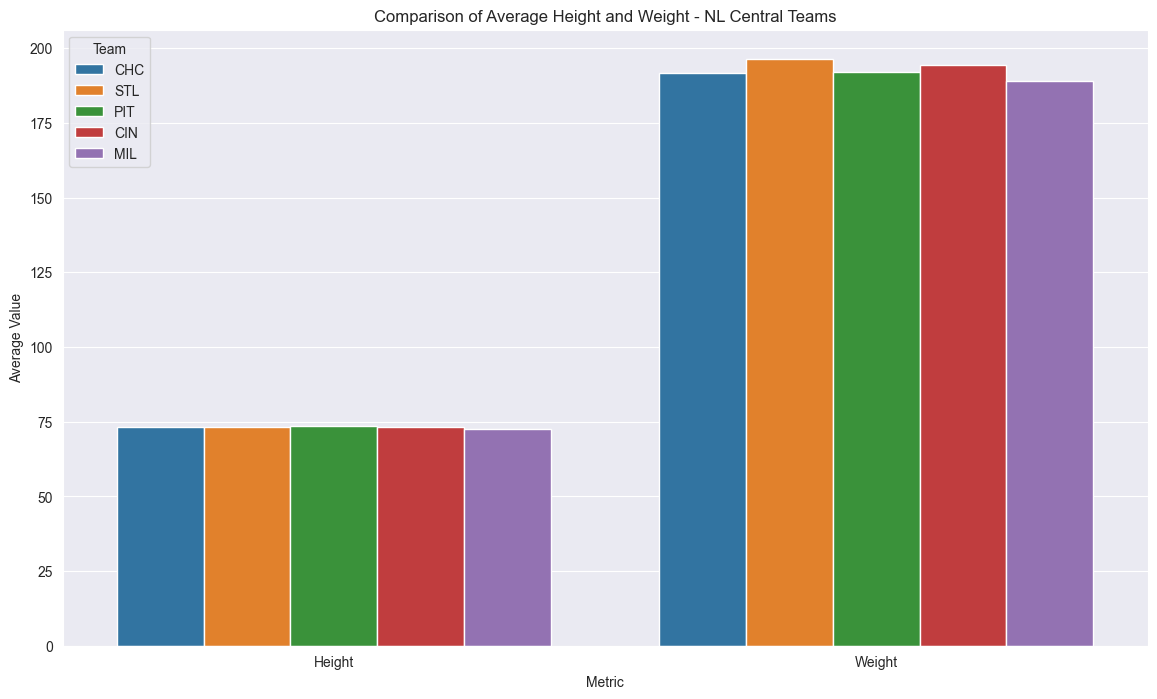

In [49]:
# Calculate average height and weight for each team
chc_avg_height = chc_players_df['Height'].mean()
chc_avg_weight = chc_players_df['Weight'].mean()
stl_avg_height = stl_players_df['Height'].mean()
stl_avg_weight = stl_players_df['Weight'].mean()
pit_avg_height = pit_players_df['Height'].mean()
pit_avg_weight = pit_players_df['Weight'].mean()
cin_avg_height = cin_players_df['Height'].mean()
cin_avg_weight = cin_players_df['Weight'].mean()
mil_avg_height = mil_players_df['Height'].mean()
mil_avg_weight = mil_players_df['Weight'].mean()

# Create individual charts for each team
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Chicago Cubs chart
sns.barplot(x=['Height', 'Weight'], y=[chc_avg_height, chc_avg_weight], ax=axes[0, 0])
axes[0, 0].set_title('Average Height and Weight - Chicago Cubs')
axes[0, 0].set_ylabel('Average Value')

# St. Louis Cardinals chart
sns.barplot(x=['Height', 'Weight'], y=[stl_avg_height, stl_avg_weight], ax=axes[0, 1])
axes[0, 1].set_title('Average Height and Weight - St. Louis Cardinals')
axes[0, 1].set_ylabel('Average Value')

# Pittsburgh Pirates chart
sns.barplot(x=['Height', 'Weight'], y=[pit_avg_height, pit_avg_weight], ax=axes[1, 0])
axes[1, 0].set_title('Average Height and Weight - Pittsburgh Pirates')
axes[1, 0].set_ylabel('Average Value')

# Cincinnati Reds chart
sns.barplot(x=['Height', 'Weight'], y=[cin_avg_height, cin_avg_weight], ax=axes[1, 1])
axes[1, 1].set_title('Average Height and Weight - Cincinnati Reds')
axes[1, 1].set_ylabel('Average Value')

# Milwaukee Brewers chart
sns.barplot(x=['Height', 'Weight'], y=[mil_avg_height, mil_avg_weight], ax=axes[2, 0])
axes[2, 0].set_title('Average Height and Weight - Milwaukee Brewers')
axes[2, 0].set_ylabel('Average Value')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

# Create a combined chart to compare the averages
avg_data = pd.DataFrame({
    'Team': ['CHC', 'CHC', 'STL', 'STL', 'PIT', 'PIT', 'CIN', 'CIN', 'MIL', 'MIL'],
    'Metric': ['Height', 'Weight', 'Height', 'Weight', 'Height', 'Weight', 'Height', 'Weight', 'Height', 'Weight'],
    'Average': [chc_avg_height, chc_avg_weight, stl_avg_height, stl_avg_weight, pit_avg_height, pit_avg_weight, cin_avg_height, cin_avg_weight, mil_avg_height, mil_avg_weight]
})

plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Average', hue='Team', data=avg_data)
plt.title('Comparison of Average Height and Weight - NL Central Teams')
plt.ylabel('Average Value')
plt.show()

In [50]:
# Print the average height and weight for each team
print(f"Chicago Cubs - Average Height: {chc_avg_height:.2f}, Average Weight: {chc_avg_weight:.2f}")
print(f"St. Louis Cardinals - Average Height: {stl_avg_height:.2f}, Average Weight: {stl_avg_weight:.2f}")
print(f"Pittsburgh Pirates - Average Height: {pit_avg_height:.2f}, Average Weight: {pit_avg_weight:.2f}")
print(f"Cincinnati Reds - Average Height: {cin_avg_height:.2f}, Average Weight: {cin_avg_weight:.2f}")
print(f"Milwaukee Brewers - Average Height: {mil_avg_height:.2f}, Average Weight: {mil_avg_weight:.2f}")


Chicago Cubs - Average Height: 73.29, Average Weight: 191.70
St. Louis Cardinals - Average Height: 73.24, Average Weight: 196.34
Pittsburgh Pirates - Average Height: 73.39, Average Weight: 192.00
Cincinnati Reds - Average Height: 73.15, Average Weight: 194.28
Milwaukee Brewers - Average Height: 72.63, Average Weight: 188.95


In [51]:
stuff = 73 / 12
print(stuff)

6.083333333333333


MLB - Average Height: 6' 1", Average Weight: 194.88 lbs


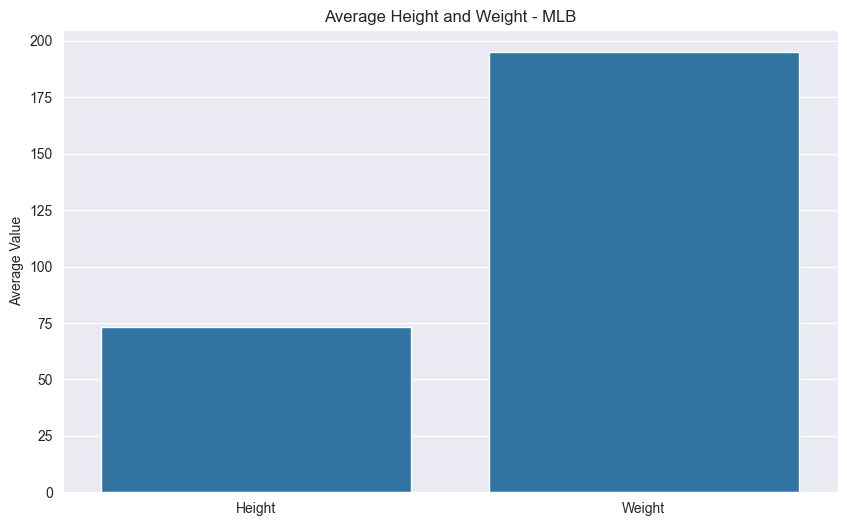

In [52]:
def convert_height(inches):
    feet = inches // 12
    remaining_inches = inches % 12
    return f"{int(feet)}' {int(remaining_inches)}\""

# Calculate average height and weight for the entire MLB
mlb_avg_height = cleaned_data['Height'].mean()
mlb_avg_weight = cleaned_data['Weight'].mean()

# Print the average height and weight for the entire MLB
print(f"MLB - Average Height: {convert_height(mlb_avg_height)}, Average Weight: {mlb_avg_weight:.2f} lbs")

# Create a bar chart for the average height and weight of the entire MLB
plt.figure(figsize=(10, 6))
sns.barplot(x=['Height', 'Weight'], y=[mlb_avg_height, mlb_avg_weight])
plt.title('Average Height and Weight - MLB')
plt.ylabel('Average Value')
plt.show()

   Position     Height      Weight
0        1B  73.994444  217.805556
1        2B  70.622120  183.944700
2        3B  72.772388  198.141791
3         C  71.604305  194.528146
4        CF  72.342593  187.240741
5        DH  73.545455  216.636364
6        IF  72.400000  182.000000
7        LF  72.457547  194.080189
8        OF  72.664634  183.439024
9         P  74.016779  193.181208
10       RF  73.078431  201.568627
11       RP  74.391387  202.258391
12       SP  74.574797  200.860163
13       SS  71.647887  175.069142


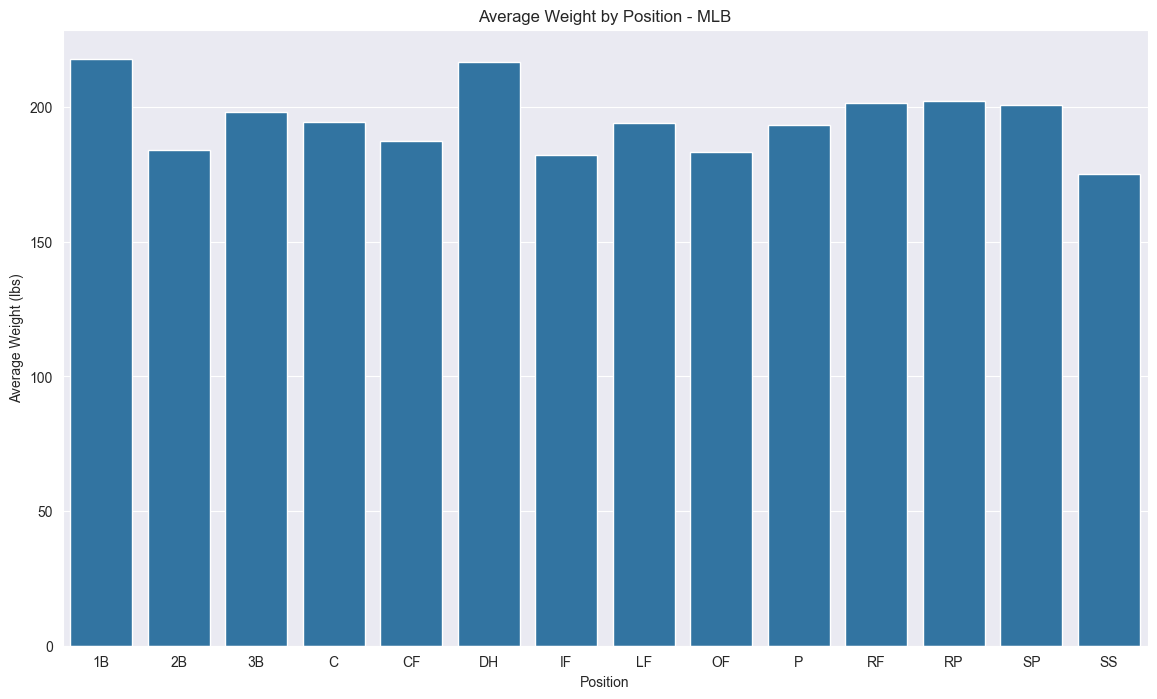

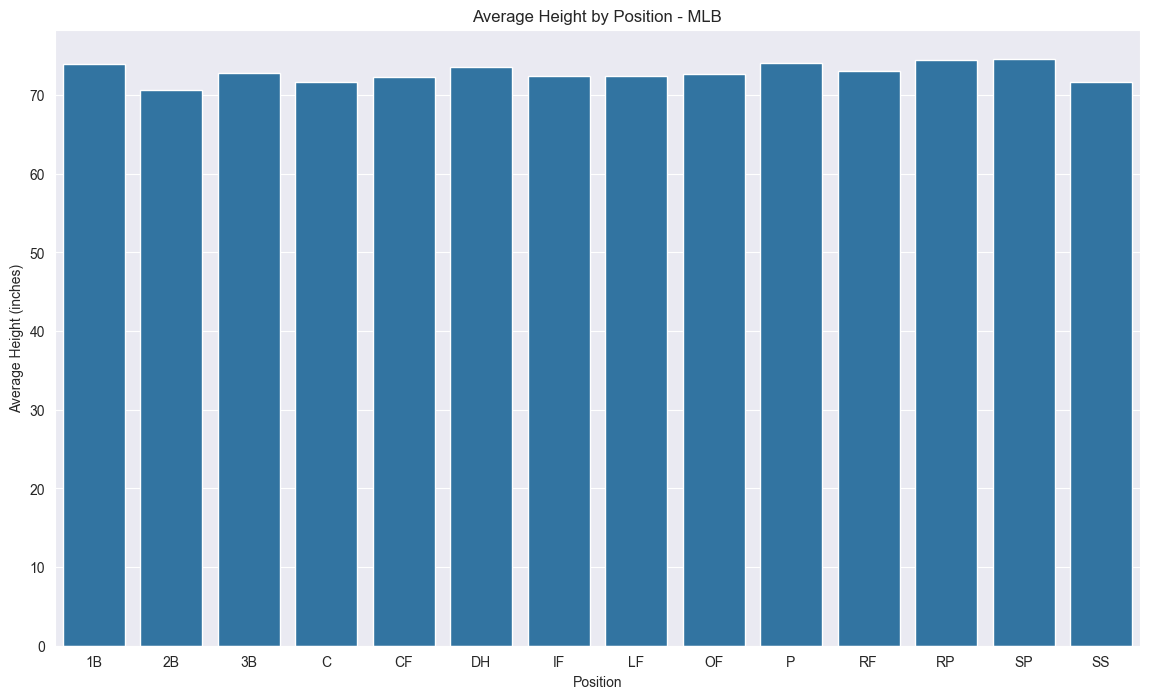

In [53]:
# Calculate average height and weight for each position
position_avg = cleaned_data.groupby('Position').agg({'Height': 'mean', 'Weight': 'mean'}).reset_index()

# Convert height to feet and inches for display
position_avg['Height'] = position_avg['Height']

# Print the average height and weight for each position
print(position_avg)

# Create a bar chart for the average height and weight of each position
plt.figure(figsize=(14, 8))
sns.barplot(x='Position', y='Weight', data=position_avg)
plt.title('Average Weight by Position - MLB')
plt.ylabel('Average Weight (lbs)')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Position', y='Height', data=position_avg)
plt.title('Average Height by Position - MLB')
plt.ylabel('Average Height (inches)')
plt.show()

In [54]:
all_players_usa = cleaned_data[cleaned_data['BirthCountry'] == 'USA']
all_players_intl = cleaned_data[cleaned_data['BirthCountry'] != 'USA']

USA Players - Average Height: 73.9, Average Weight: 204.47 lbs
International Players - Average Height: 72.54, Average Weight: 182.30 lbs


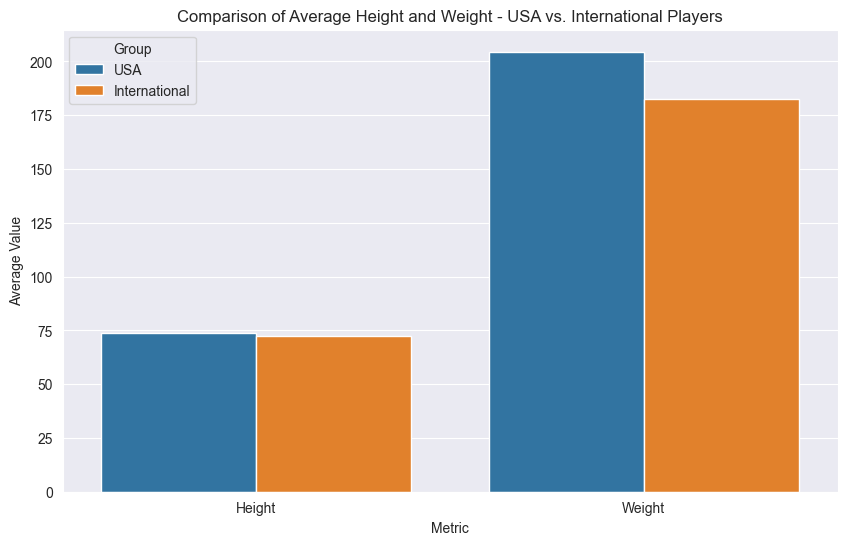

In [55]:

all_players_usa = cleaned_data[cleaned_data['BirthCountry'] == 'Usa']
all_players_intl = cleaned_data[cleaned_data['BirthCountry'] != 'Usa']
# Calculate average height and weight for USA-born players
usa_avg_height = all_players_usa['Height'].mean()
usa_avg_weight = all_players_usa['Weight'].mean()

# Calculate average height and weight for international players
intl_avg_height = all_players_intl['Height'].mean()
intl_avg_weight = all_players_intl['Weight'].mean()

# Print the average height and weight for USA-born and international players
print(f"USA Players - Average Height: {round((usa_avg_height), 2)}, Average Weight: {usa_avg_weight:.2f} lbs")
print(f"International Players - Average Height: {round((intl_avg_height), 2)}, Average Weight: {intl_avg_weight:.2f} lbs")

# Create a bar chart to compare the average height and weight of USA-born and international players
avg_data = pd.DataFrame({
    'Group': ['USA', 'USA', 'International', 'International'],
    'Metric': ['Height', 'Weight', 'Height', 'Weight'],
    'Average': [usa_avg_height, usa_avg_weight, intl_avg_height, intl_avg_weight]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average', hue='Group', data=avg_data)
plt.title('Comparison of Average Height and Weight - USA vs. International Players')
plt.ylabel('Average Value')
plt.show()

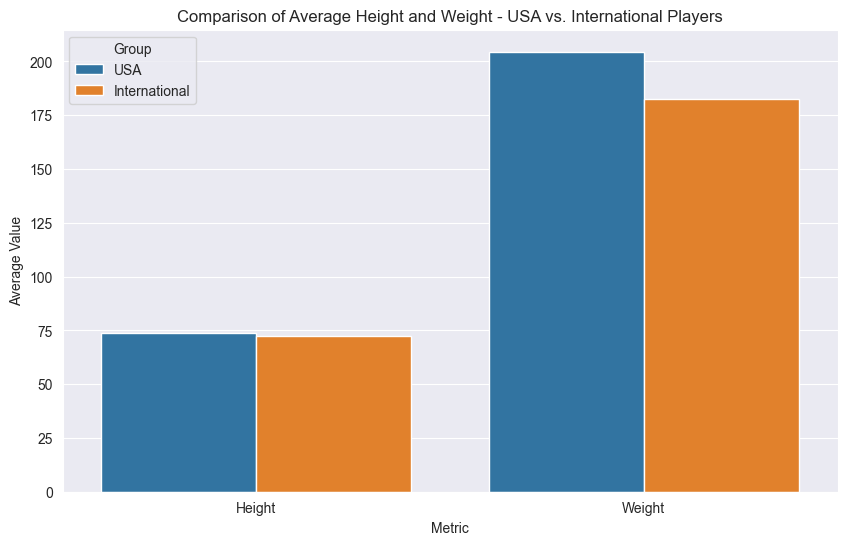

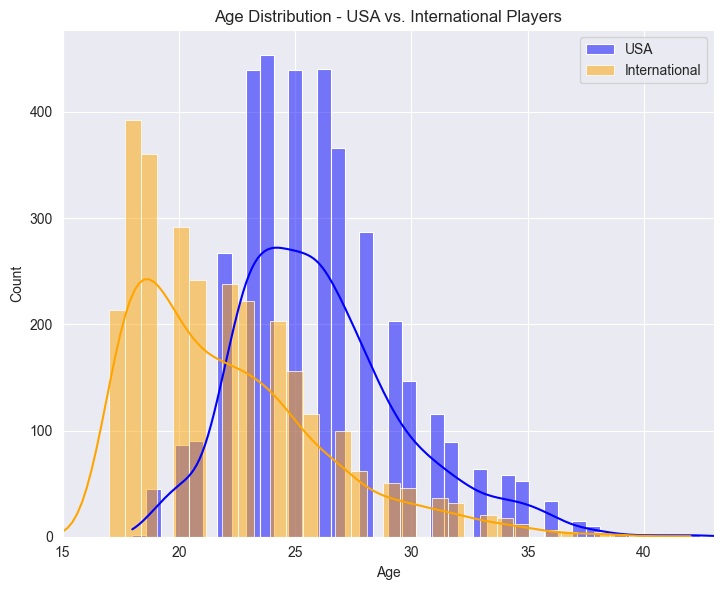

     AgeGroup         BirthCountry     Height  Weight
0    (16, 18]                 2001        NaN     NaN
1    (16, 18]  Antigua And Barbuda        NaN     NaN
2    (16, 18]                Aruba  71.750000   171.0
3    (16, 18]            Australia  76.000000   163.0
4    (16, 18]              Bahamas  71.000000   170.0
..        ...                  ...        ...     ...
303  (40, 45]       United Kingdom        NaN     NaN
304  (40, 45]        United States        NaN     NaN
305  (40, 45]                  Usa  74.666667   213.5
306  (40, 45]            Venezuela        NaN     NaN
307  (40, 45]       Virgin Islands        NaN     NaN

[308 rows x 4 columns]


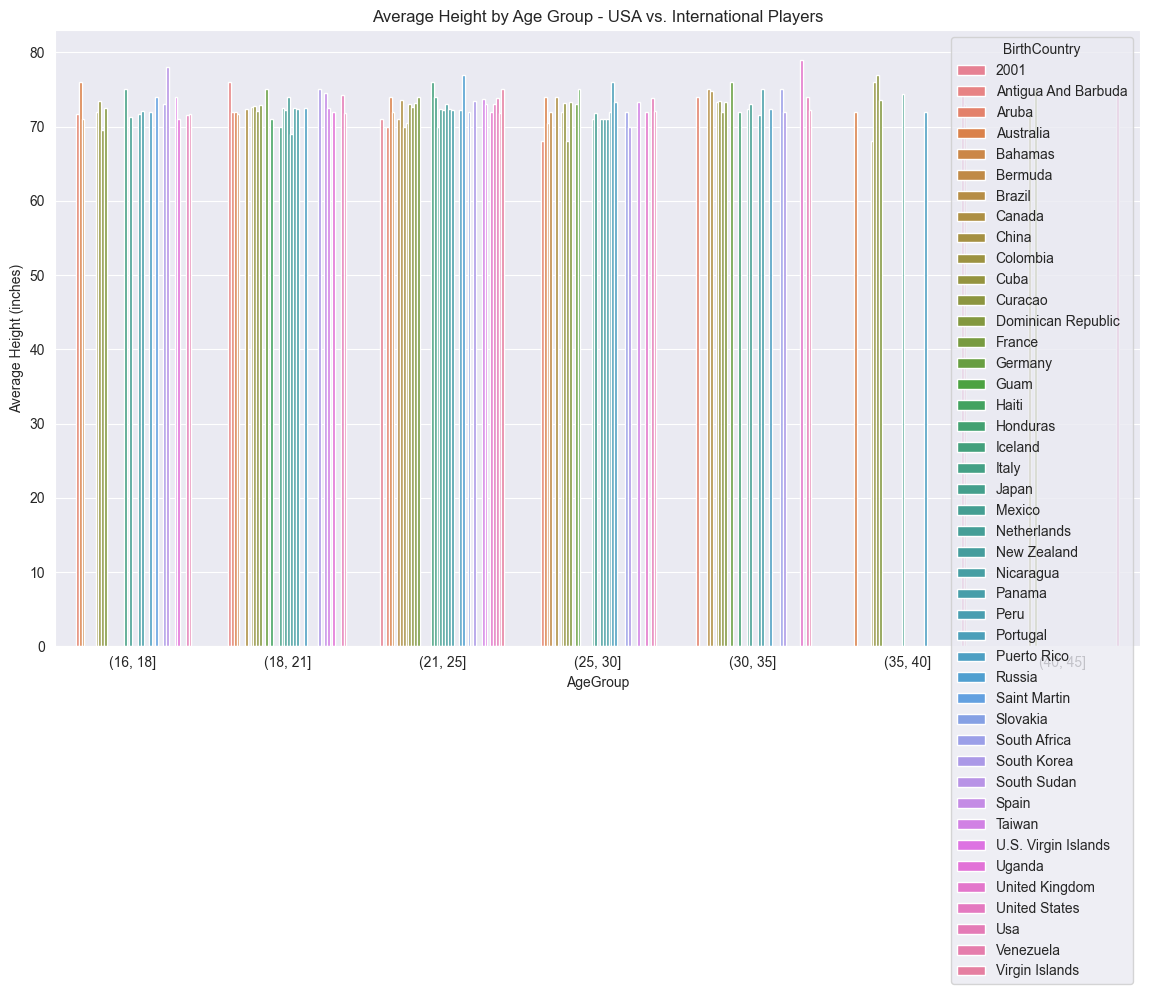

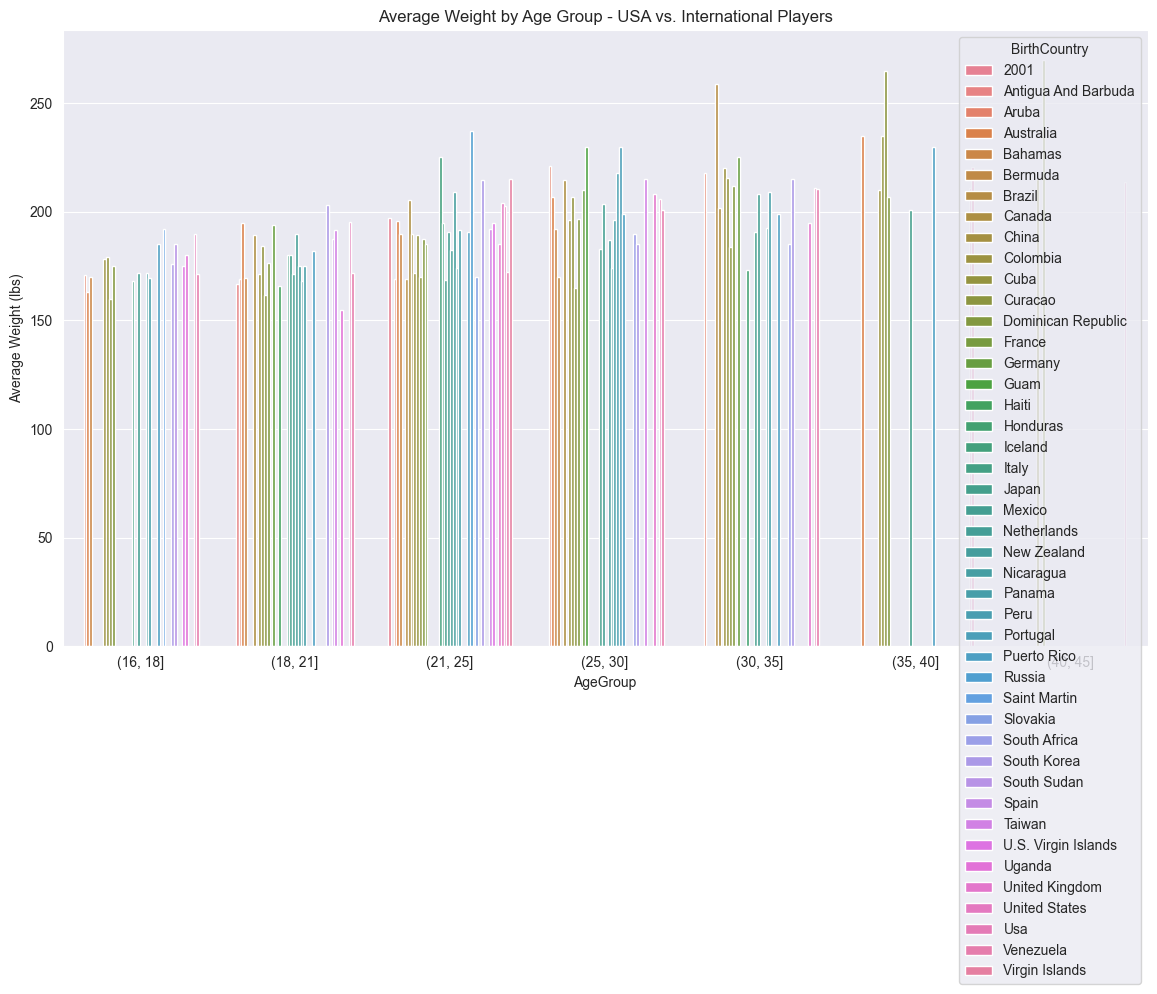

In [58]:
# Create a bar chart to compare the average height and weight of USA-born and international players
avg_data = pd.DataFrame({
    'Group': ['USA', 'USA', 'International', 'International'],
    'Metric': ['Height', 'Weight', 'Height', 'Weight'],
    'Average': [usa_avg_height, usa_avg_weight, intl_avg_height, intl_avg_weight]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average', hue='Group', data=avg_data)
plt.title('Comparison of Average Height and Weight - USA vs. International Players')
plt.ylabel('Average Value')
plt.show()

# Plot the age distribution for both groups
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(all_players_usa['Age'], kde=True, color='blue', label='USA')
sns.histplot(all_players_intl['Age'], kde=True, color='orange', label='International')
plt.title('Age Distribution - USA vs. International Players')
plt.xlabel('Age')
plt.xlim(15, cleaned_data['Age'].max())
plt.legend()

plt.tight_layout()
plt.show()

# Analyze averages by age group
age_bins = [16, 18, 21, 25, 30, 35, 40, 45]
cleaned_data['AgeGroup'] = pd.cut(cleaned_data['Age'], bins=age_bins)

# Calculate average height and weight for each age group
age_group_avg = cleaned_data.groupby(['AgeGroup', 'BirthCountry']).agg({'Height': 'mean', 'Weight': 'mean'}).reset_index()

# Filter to only include USA and International groups
age_group_avg = age_group_avg[age_group_avg['BirthCountry'].str.lower().isin(['usa']) | (age_group_avg['BirthCountry'].str.lower() != 'usa')]

# Print the average height and weight for each age group
print(age_group_avg)

# Create a bar chart to compare the average height and weight by age group
plt.figure(figsize=(14, 8))
sns.barplot(x='AgeGroup', y='Height', hue='BirthCountry', data=age_group_avg)
plt.title('Average Height by Age Group - USA vs. International Players')
plt.ylabel('Average Height (inches)')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='AgeGroup', y='Weight', hue='BirthCountry', data=age_group_avg)
plt.title('Average Weight by Age Group - USA vs. International Players')
plt.ylabel('Average Weight (lbs)')
plt.show()